## Task-D: Collinear features and their effect on linear models

In [53]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
data = pd.read_csv('task_d.csv')

In [55]:
data.head()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
0,-0.581066,0.841837,-1.012978,-0.604025,0.841837,-0.665927,-0.536277,0
1,-0.894309,-0.207835,-1.012978,-0.883052,-0.207835,-0.917054,-0.522364,0
2,-1.207552,0.212034,-1.082312,-1.150918,0.212034,-1.166507,0.205738,0
3,-1.364174,0.002099,-0.943643,-1.280666,0.002099,-1.266540,-0.665720,0
4,-0.737687,1.051772,-1.012978,-0.744934,1.051772,-0.792746,-0.735054,0


In [56]:
X = data.drop(['target'], axis=1).values
Y = data['target'].values

### Doing perturbation test to check the presence of collinearity  

#### Task: 1 Logistic Regression
<pre>


1. <b>Finding the Correlation between the features</b>
    a. check the correlation between the features
    b. plot heat map of correlation matrix using seaborn heatmap
2. <b>Finding the best model for the given data</b>
    a. Train Logistic regression on data(X,Y) that we have created in the above cell
    b. Find the best hyper prameter alpha with hyper parameter tuning using k-fold cross validation (grid search CV or         
    random search CV make sure you choose the alpha in log space)
    c. Creat a new Logistic regression with the best alpha
    (search for how to get the best hyper parameter value), name the best model as 'best_model'
    
3. <b>Getting the weights with the original data</b>
    a. train the 'best_model' with X, Y
    b. Check the accuracy of the model 'best_model_accuracy'
    c. Get the weights W using best_model.coef_

4. <b>Modifying original data</b>
    a. Add a noise(order of 10^-2) to each element of X 
    and get the new data set X' (X' = X + e)
    b. Train the same 'best_model' with data (X', Y)
    c. Check the accuracy of the model 'best_model_accuracy_edited'
    d. Get the weights W' using best_model.coef_
    
5. <b> Checking deviations in metric and weights </b>
    a. find the difference between 'best_model_accuracy_edited' and 'best_model_accuracy'
    b. find the absolute change between each value of W and W' ==> |(W-W')|
    c. print the top 4 features which have higher % change in weights 
    compare to the other feature

</pre>

#### Task: 2 Linear SVM

<pre>
1. Do the same steps (2, 3, 4, 5) we have done in the above task 1.
</pre>

<strong><font color='red'>Do write the observations based on the results you get from the deviations of weights in both Logistic Regression and linear SVM</font></strong>

### Task 1:
#### Logistic Regression:
##### Correlation between features:

In [57]:
data.corr()

,x,y,z,x*x,2*y,2*z+3*x*x,w,target
x,1.000000,-0.205926,0.812458,0.997947,-0.205926,0.996252,0.583277,0.728290
y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
z,0.812458,-0.602663,1.000000,0.807137,-0.602663,0.847163,0.674486,0.969990
x*x,0.997947,-0.209289,0.807137,1.000000,-0.209289,0.997457,0.583803,0.719570
2*y,-0.205926,1.000000,-0.602663,-0.209289,1.000000,-0.261123,-0.401790,-0.690684
2*z+3*x*x,0.996252,-0.261123,0.847163,0.997457,-0.261123,1.000000,0.606860,0.764729
w,0.583277,-0.401790,0.674486,0.583803,-0.401790,0.606860,1.000000,0.641750
target,0.728290,-0.690684,0.969990,0.719570,-0.690684,0.764729,0.641750,1.000000


### Heat map of correlation matrix:

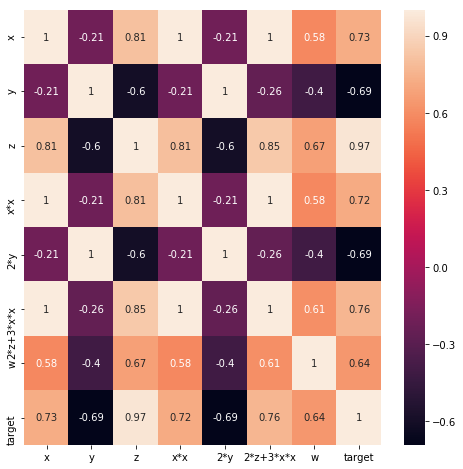

In [58]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(),annot=True)

### Finding the best model for the data :

In [59]:
lr=SGDClassifier(loss='log')
params={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf=GridSearchCV(lr,params,cv=5)
clf.fit(X,Y)
clf.best_params_

{'alpha': 0.0001}

In [60]:
best_model=SGDClassifier(loss='log',alpha=0.0001)
best_model.fit(X,Y)
best_model

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [61]:
from sklearn.metrics import accuracy_score
y_pred=best_model.predict(X)
best_model_accu=accuracy_score(Y,y_pred)
best_model_accu

1.0

In [62]:
w=best_model.coef_
print('weights:',w)

weights: [[10.46265726 -6.98960392 23.25622809  9.70788213 -6.98960392 11.54495865
   7.77405207]]


#### Adding noise to the dataset and applying Logistic regression:

In [63]:
X_new = [i + 0.01 for i in X]

In [64]:
best_model_edited=SGDClassifier(loss='log',alpha=0.0001)
best_model_edited.fit(X_new,Y)
best_model_edited

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='log', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [65]:
y_pred=best_model_edited.predict(X_new)
best_model_accuracy_edited=accuracy_score(Y,y_pred)
best_model_accuracy_edited

1.0

In [70]:
w_edit=best_model_edited.coef_
print('weights for the edited dataset:\n',w_edit)

weights for the edited dataset:
 [[  8.28213712 -13.30356011  26.07978372   6.81824365 -13.30356011
    9.28395486   7.54076686]]


In [69]:
accuracy_diff=best_model_accuracy_edited-best_model_accu
print('Difference between best_model_accuracy_edited and best_model_accuracy:\n',accuracy_diff)

Difference between best_model_accuracy_edited and best_model_accuracy:
 0.0


In [71]:
weight_deviation=np.abs(w-w_edit)
print('absolute change between each value of W and W:\n',weight_deviation)

absolute change between each value of W and W:
 [[2.18052014 6.31395619 2.82355563 2.88963848 6.31395619 2.26100379
  0.23328521]]


In [75]:
print("Top 4 features which have higher % change in weights compare to the other features:")
columns = list(data.columns)
for index in np.argsort(-weight_deviation).reshape(-1)[:4]:
    print(columns[index])
    

Top 4 features which have higher % change in weights compare to the other features:
y
2*y
x*x
z


## Task-2
### Linear SVM
#### Finding the best model for the data:

In [79]:
svm=SGDClassifier(loss='hinge')
params={'alpha':[0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000]}
clf=GridSearchCV(svm,params,cv=5)
clf.fit(X,Y)
clf.best_params_

{'alpha': 1e-05}

In [80]:
best_model_svm=SGDClassifier(loss='hinge',alpha=0.00001)
best_model_svm.fit(X,Y)
best_model_svm

SGDClassifier(alpha=1e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [81]:
from sklearn.metrics import accuracy_score
y_pred1=best_model_svm.predict(X)
best_model_accu_svm=accuracy_score(Y,y_pred1)
best_model_accu_svm

1.0

In [84]:
w_svm=best_model_svm.coef_
print('weights:',w_svm)

weights: [[ 25.58166705 -48.00529075  73.6106008   21.87587983 -48.00529075
   28.57566189  23.25669551]]


#### Adding noise to the dataset and applying SVM:

In [85]:
X_ne = [i + 0.01 for i in X]

In [87]:
best_model_edited_svm=SGDClassifier(loss='hinge',alpha=0.00001)
best_model_edited_svm.fit(X_ne,Y)
best_model_edited_svm

SGDClassifier(alpha=1e-05, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [88]:
y_pred=best_model_edited_svm.predict(X_new)
best_model_accuracy_edited_svm=accuracy_score(Y,y_pred)
best_model_accuracy_edited_svm

1.0

In [89]:
w_edit_svm=best_model_edited_svm.coef_
print('weights:',w_edit_svm)

weights: [[ 41.83586991 -34.09186961  73.08312791  34.50504752 -34.09186961
   39.87495896  33.79637101]]


In [90]:
accuracy_diff_svm=best_model_accuracy_edited_svm-best_model_accu_svm
print('Difference between best_model_accuracy_edited and best_model_accuracy:\n',accuracy_diff_svm)

Difference between best_model_accuracy_edited and best_model_accuracy:
 0.0


In [92]:
weight_deviation_svm=np.abs(w_svm-w_edit_svm)
print('absolute change between each value of W and W:\n',weight_deviation_svm)

absolute change between each value of W and W:
 [[16.25420286 13.91342114  0.52747289 12.62916768 13.91342114 11.29929707
  10.53967551]]


In [93]:
print("Top 4 features which have higher % change in weights compare to the other features:")
columns = list(data.columns)
for index in np.argsort(-weight_deviation_svm).reshape(-1)[:4]:
    print(columns[index])
    

Top 4 features which have higher % change in weights compare to the other features:
x
y
2*y
x*x


## Observation:


After applying both Logistic Regression and Linear SVM on the dataset and performing perturbation tests to check the presence of collinearity.
The percentage change in the estimates of original data and perturbed data after applying Logistic Regression is comparatively lower than the percentage change in the estimates after applying Linear SVM.
Hence the collinearity is relatively more stable when Logistic Regression is applied to this dataset rather than linear SVM and the estimates do not vary a lot.